In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv
/kaggle/input/aiffel-ds-3-house-prices/train.csv
/kaggle/input/aiffel-ds-3-house-prices/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/kaggle/input/aiffel-ds-3-house-prices/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [3]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtFinType2      24
BsmtExposure      24
BsmtFinType1      23
BsmtCond          23
BsmtQual          23
MasVnrArea         8
Electrical         1
dtype: int64


1168개면 많이 없어서 결측값 제거시에 신중해야한다. 피처는81개로 많다.

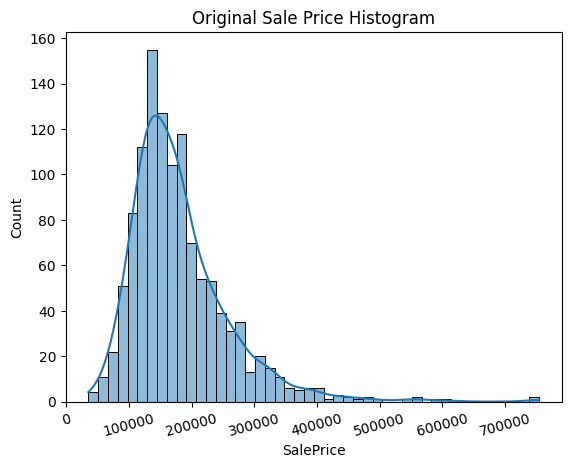

In [4]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

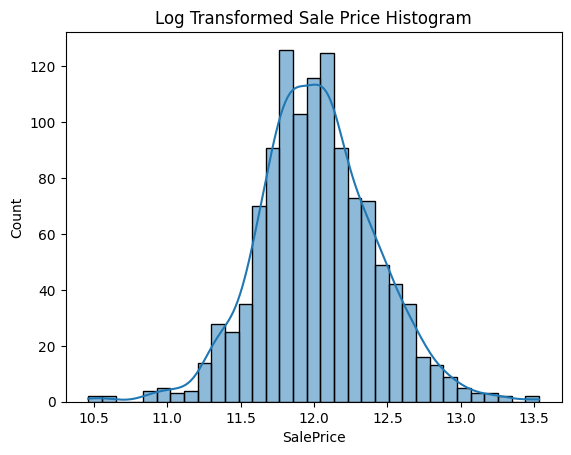

In [5]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [6]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [7]:
# 'PoolQC' , 'MiscFeature', 'Alley', 'Fence' 결측치가 너무 많다.
# 수영장 품질, 기타 특성, 골목 접근 유형, 울타리 품질.
# MasVnrType 미적인 이유로 사용하는 겉면 마감재 # 카테고리
# FireplaceQu 벽난로의 품질  # 카테고리
# LotFrontage 부동산의 도로에 접한 길이 # 수치형

In [8]:
# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence'], axis=1 , inplace=True)

In [9]:
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))
# 없어서 null인 칼럼들은 후에 원핫인코딩으로 표현가능.
# garage 관련 69개
# bsmt24~23
# MasVnrArea 고급 장식 면적
# Electrical 전기


Null 컬럼과 그 건수:
  MasVnrType      694
FireplaceQu     545
LotFrontage     218
GarageType       69
GarageYrBlt      69
GarageFinish     69
GarageQual       69
GarageCond       69
BsmtExposure     24
BsmtFinType2     24
BsmtQual         23
BsmtCond         23
BsmtFinType1     23
MasVnrArea        8
Electrical        1
dtype: int64


In [10]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,NaN,7390,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,11.813037
1,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,12.095147
2,20,RL,54.0,13811,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,12.078245
3,20,RL,93.0,12030,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,New,Partial,12.669810
4,50,RL,60.0,8064,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2000,7,2007,WD,Normal,11.719134


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
house_df[house_df['GarageType'].isnull()]
# garage 관련 69개 -> garage가 없음.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,120,0,0,0,0,0,0,3,2009,WD,Alloca,12.095147
34,75,RM,92.0,5520,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,6,6,1912,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,755,755,GasA,Ex,Y,SBrkr,929,929,371,2229,0,0,1,0,5,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,198,30,0,0,0,0,7,2009,WD,Abnorml,11.552156
35,30,RL,55.0,5350,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,450,5,2010,WD,Normal,11.245059
41,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,2008,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,TA,Y,SBrkr,798,546,0,1344,0,0,1,1,3,1,TA,6,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,5,2009,WD,Normal,11.482477
69,90,RL,81.0,11841,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,0,5,2007,WD,Normal,11.682677
89,20,RL,50.0,7207,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696,Unf,0,162,858,GasA,Gd,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,117,0,0,0,0,0,0,2,2010,WD,Normal,11.665655
102,20,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,11.767188
110,20,RL,50.0,9405,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,9,1947,2008,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Ex,CBlock,TA,TA,No,Unf,0,Unf,0,698,698,GasA,Ex,Y,SBrkr,698,0,0,698,0,1,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,200,0,0,0,0,0,6,2009,WD,Normal,11.678448
122,90,RL,75.0,9825,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1965,1965,Hip,CompShg,AsphShn,AsphShn,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,SBrkr,1664,0,0,1664,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,5,2010,WD,Normal,11.512935
141,70,RM,60.0,6882,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,6,7,1914,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,684,684,GasA,TA,Y,SBrkr,773,582,0,1355,0,0,1,1,3,1,Gd,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,136,0,115,0,0,0,0,3,2007,WD,Normal,11.751950


In [12]:
pd.reset_option('all')

In [13]:
# 결측치를 0으로 대체
house_df['GarageYrBlt'].fillna(0, inplace=True)
# 이진 피처 추가
house_df['HasGarage'] = house_df['GarageYrBlt'].apply(lambda x: 1 if x > 0 else 0)

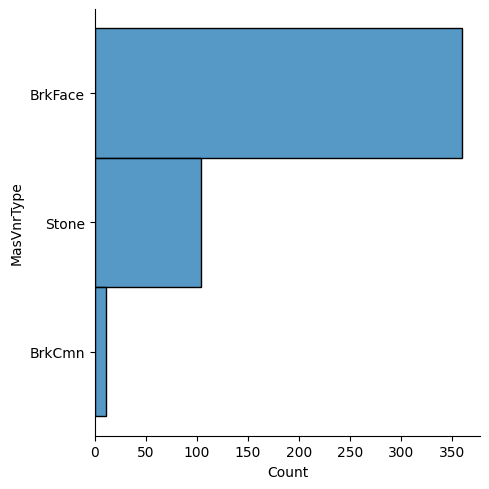

In [14]:
sns.displot(data=house_df, y='MasVnrType')
# stone이 좋은거고 # brkface 흔히 붉은색 벽돌 # brkCmn 일반 벽돌

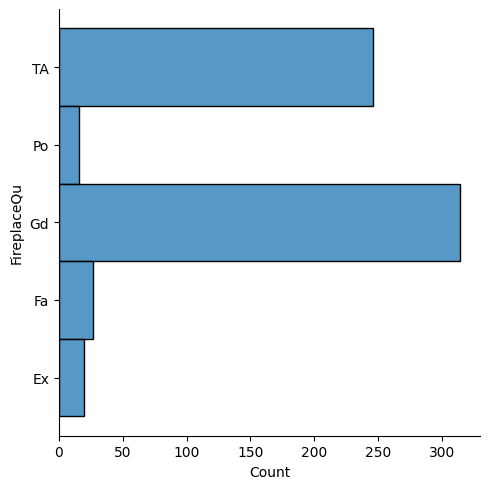

In [15]:
sns.displot(data=house_df, y='FireplaceQu')
# 벽난로의 상태를 5개로 평가
# 없으면 null

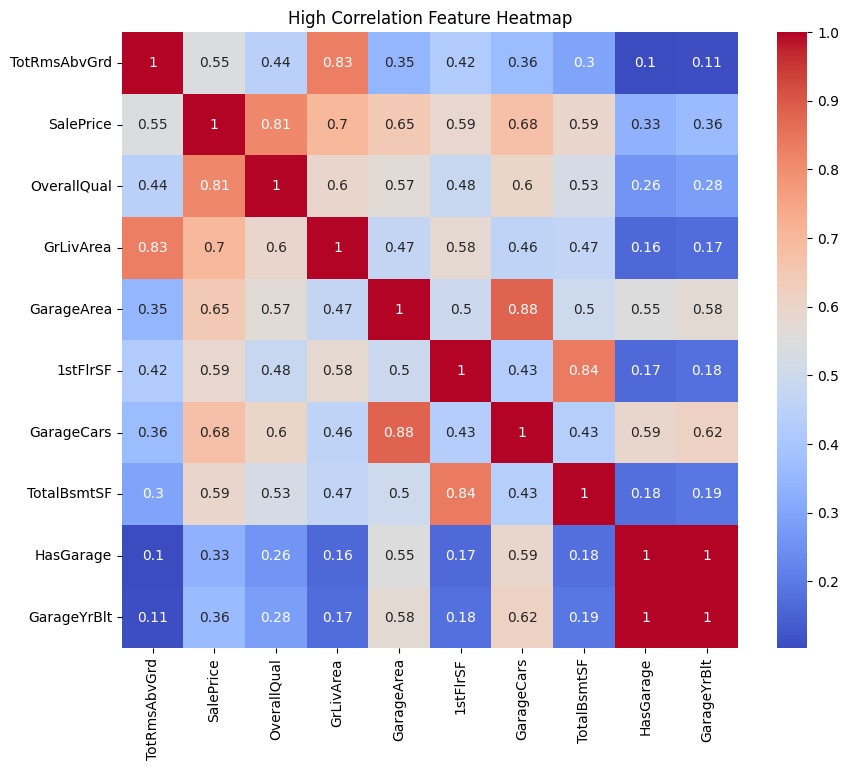

In [16]:
correlation_matrix = house_df.select_dtypes(include=['number']).corr()
# 상관계수 절댓값이 특정 임계값(0.7) 이상인 경우를 필터링
threshold = 0.7
high_corr = correlation_matrix[correlation_matrix.abs() > threshold].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  # 자기 자신과의 상관관계 제외
high_corr.columns = ['Feature1', 'Feature2', 'Correlation']

# 피처 목록 추출
high_corr_features = high_corr['Feature1'].tolist() + high_corr['Feature2'].tolist()
high_corr_features = list(set(high_corr_features))  # 중복 제거

# 높은 상관관계를 가진 피처로 필터링된 상관행렬
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('High Correlation Feature Heatmap')
plt.show()

# salePrice와 높은 상관관계 GarageArea, TotalBsmtSF(지하층의 총면적), GrLivArea(지상 생활 공간 면적), OverallQual: 전반적인 재료 및 마감 품질
# 독립변수간 상관관게 높은 피처 (0.8이상)
# garageArea, garageCars
# TotalBsmtSF(지하층면적), 1stFlrsF(1층면적) 
# GrLivArea(지상 생활 공간 면적) TotalBsmtSF(지하층의 총면적) 
# GarageTrBlt(차고 건축 연도),YearBuilt(원래 건설된 연도.)

# 후에 정규화 기법을 사용해서 다중공선성 문제 완화.
# -> 지하랑 지상 관련이 있는 경우 지상부분만 남겨보자.
# -> 피처 제거했더니 결과가 더 안좋아졌다.

In [17]:
isnull_columns = isnull_series[isnull_series > 0].sort_values(ascending=False).index
missing_counts = house_df[isnull_columns].isnull().sum()

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

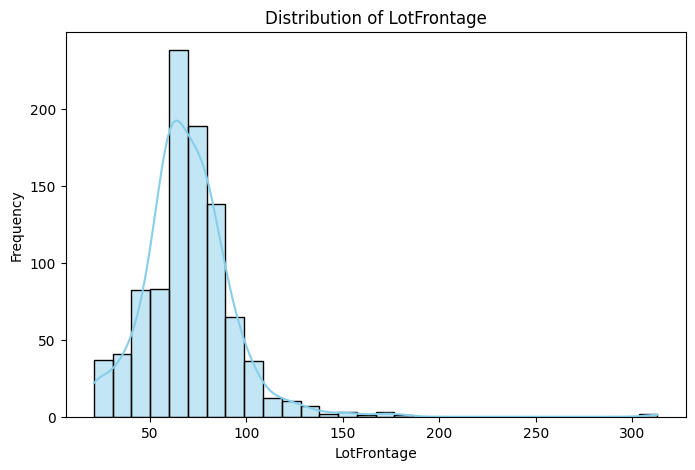

<Figure size 800x500 with 0 Axes>

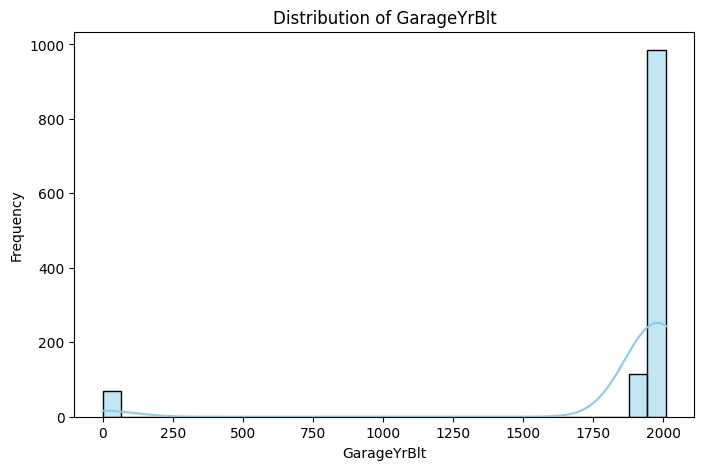

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

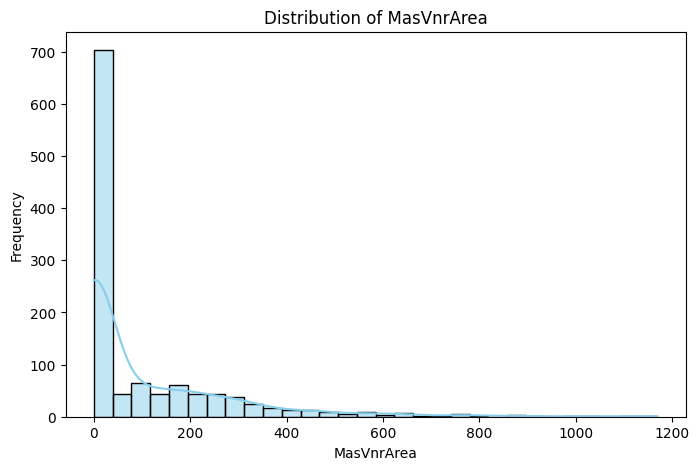

<Figure size 800x500 with 0 Axes>

In [18]:
for col in isnull_columns:
    plt.figure(figsize=(8, 5))
    
    if house_df[col].dtype in ['float64', 'int64','int32','float32']:  # 수치형 데이터
        sns.histplot(house_df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:  # 범주형 데이터
        pass
    
    plt.show()

<Axes: xlabel='Electrical', ylabel='Count'>

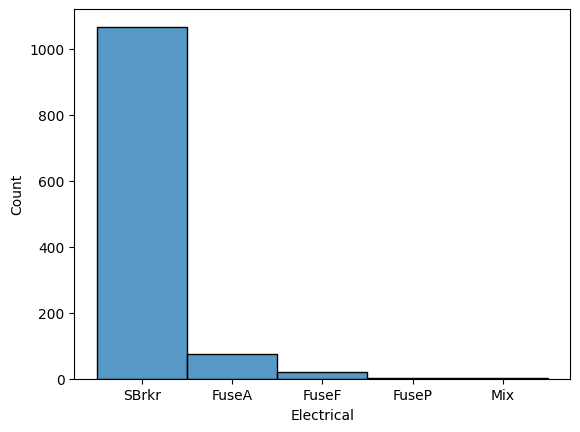

In [19]:
sns.histplot(house_df['Electrical'])

In [20]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage
0,20,RL,NaN,7390,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2008,WD,Normal,11.813037,1
1,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3,2009,WD,Alloca,12.095147,0
2,20,RL,54.0,13811,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2006,WD,Normal,12.078245,1
3,20,RL,93.0,12030,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,12,2007,New,Partial,12.669810,1
4,50,RL,60.0,8064,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,2000,7,2007,WD,Normal,11.719134,1


In [21]:
# 지하칠 관련 피처 결측치 카테고리값. 없어서 결측치 인 것,
# 1037레코드
house_df[house_df['BsmtExposure'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage
37,20,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2009,WD,Normal,11.589896,1
62,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,12,2008,WD,Normal,11.482477,1
66,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2006,WD,Normal,11.379406,1
122,90,RL,75.0,9825,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2010,WD,Normal,11.512935,0
286,190,RM,70.0,5600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,3500,7,2010,WD,Normal,10.915107,0
318,20,RL,100.0,21750,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,11,2009,WD,Normal,11.652696,1
376,20,RL,NaN,11500,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,1,2009,WD,Normal,11.338584,1
437,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2008,WD,Normal,11.495789,1
521,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,6,2009,WD,Alloca,11.686585,1
548,90,RL,70.0,9842,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,3,2007,WD,Normal,11.530775,1


In [22]:
# 수치형 데이터
# LotFrontage,MasVnrArea 평균값으로 대체
house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean(),inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean(),inplace=True)

In [23]:
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  MasVnrType      694
FireplaceQu     545
GarageType       69
GarageFinish     69
GarageQual       69
GarageCond       69
BsmtExposure     24
BsmtFinType2     24
BsmtQual         23
BsmtCond         23
BsmtFinType1     23
Electrical        1
dtype: int64


In [24]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

get_dummies() 수행 전 데이터 Shape: (1168, 77)
get_dummies() 수행 후 데이터 Shape: (1168, 273)


In [25]:
null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

## Null 피처의 Type :
 Series([], dtype: object)


In [26]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.133
Ridge 로그 변환된 RMSE: 0.133
Lasso 로그 변환된 RMSE: 0.175


[0.13256668352536044, 0.13262773826038923, 0.17489675176133937]

In [28]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

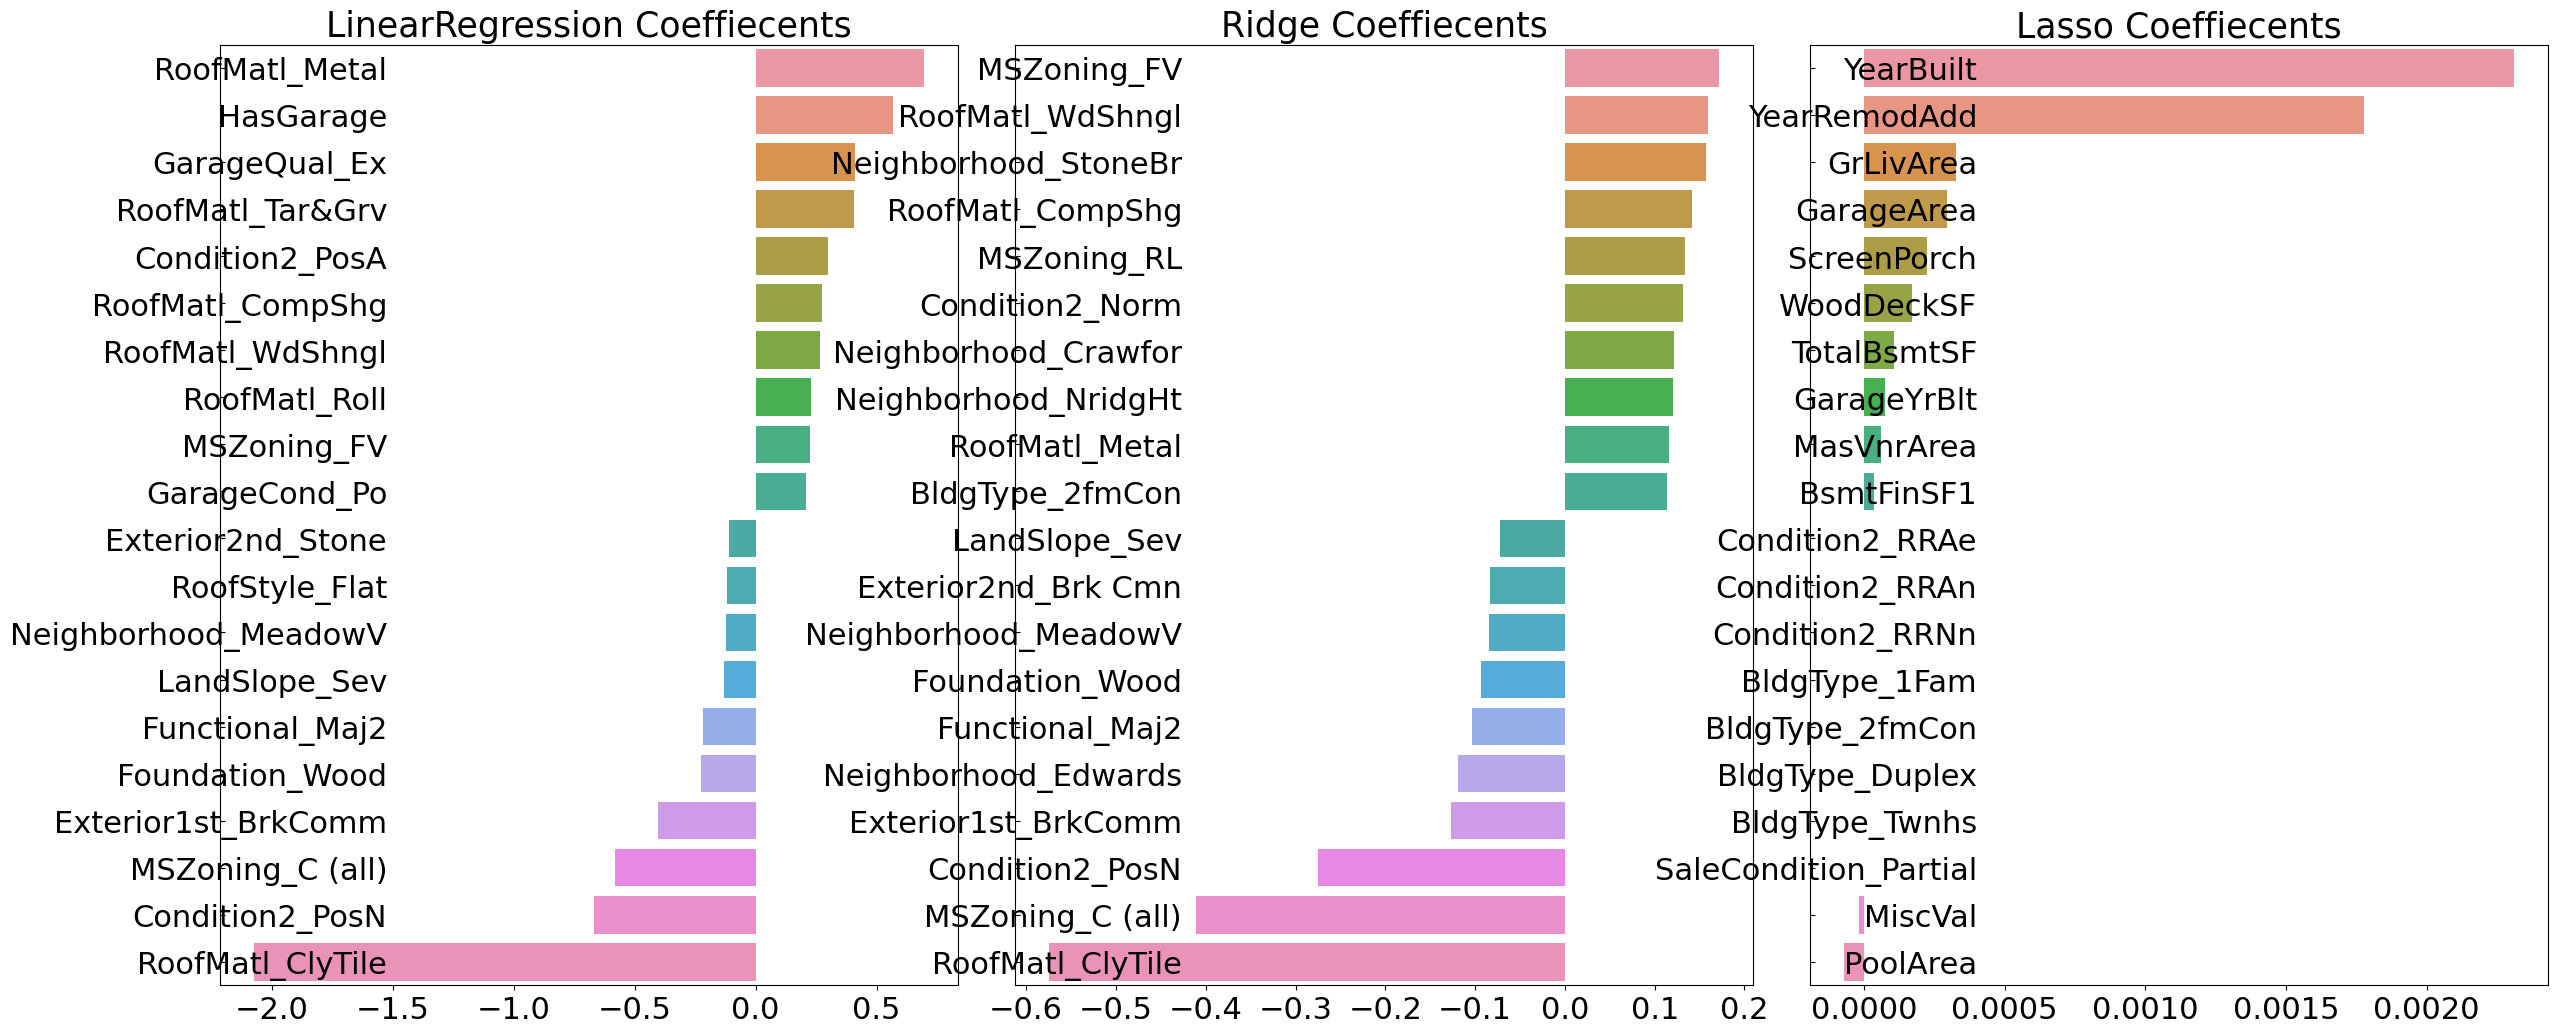

In [29]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [30]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.247 0.197 0.11  0.132 0.116]
LinearRegression CV 평균 RMSE 값: 0.16

Ridge CV RMSE 값 리스트: [0.213 0.174 0.119 0.13  0.119]
Ridge CV 평균 RMSE 값: 0.151

Lasso CV RMSE 값 리스트: [0.285 0.208 0.171 0.182 0.17 ]
Lasso CV 평균 RMSE 값: 0.203


In [31]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1508, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1522, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.133
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.122


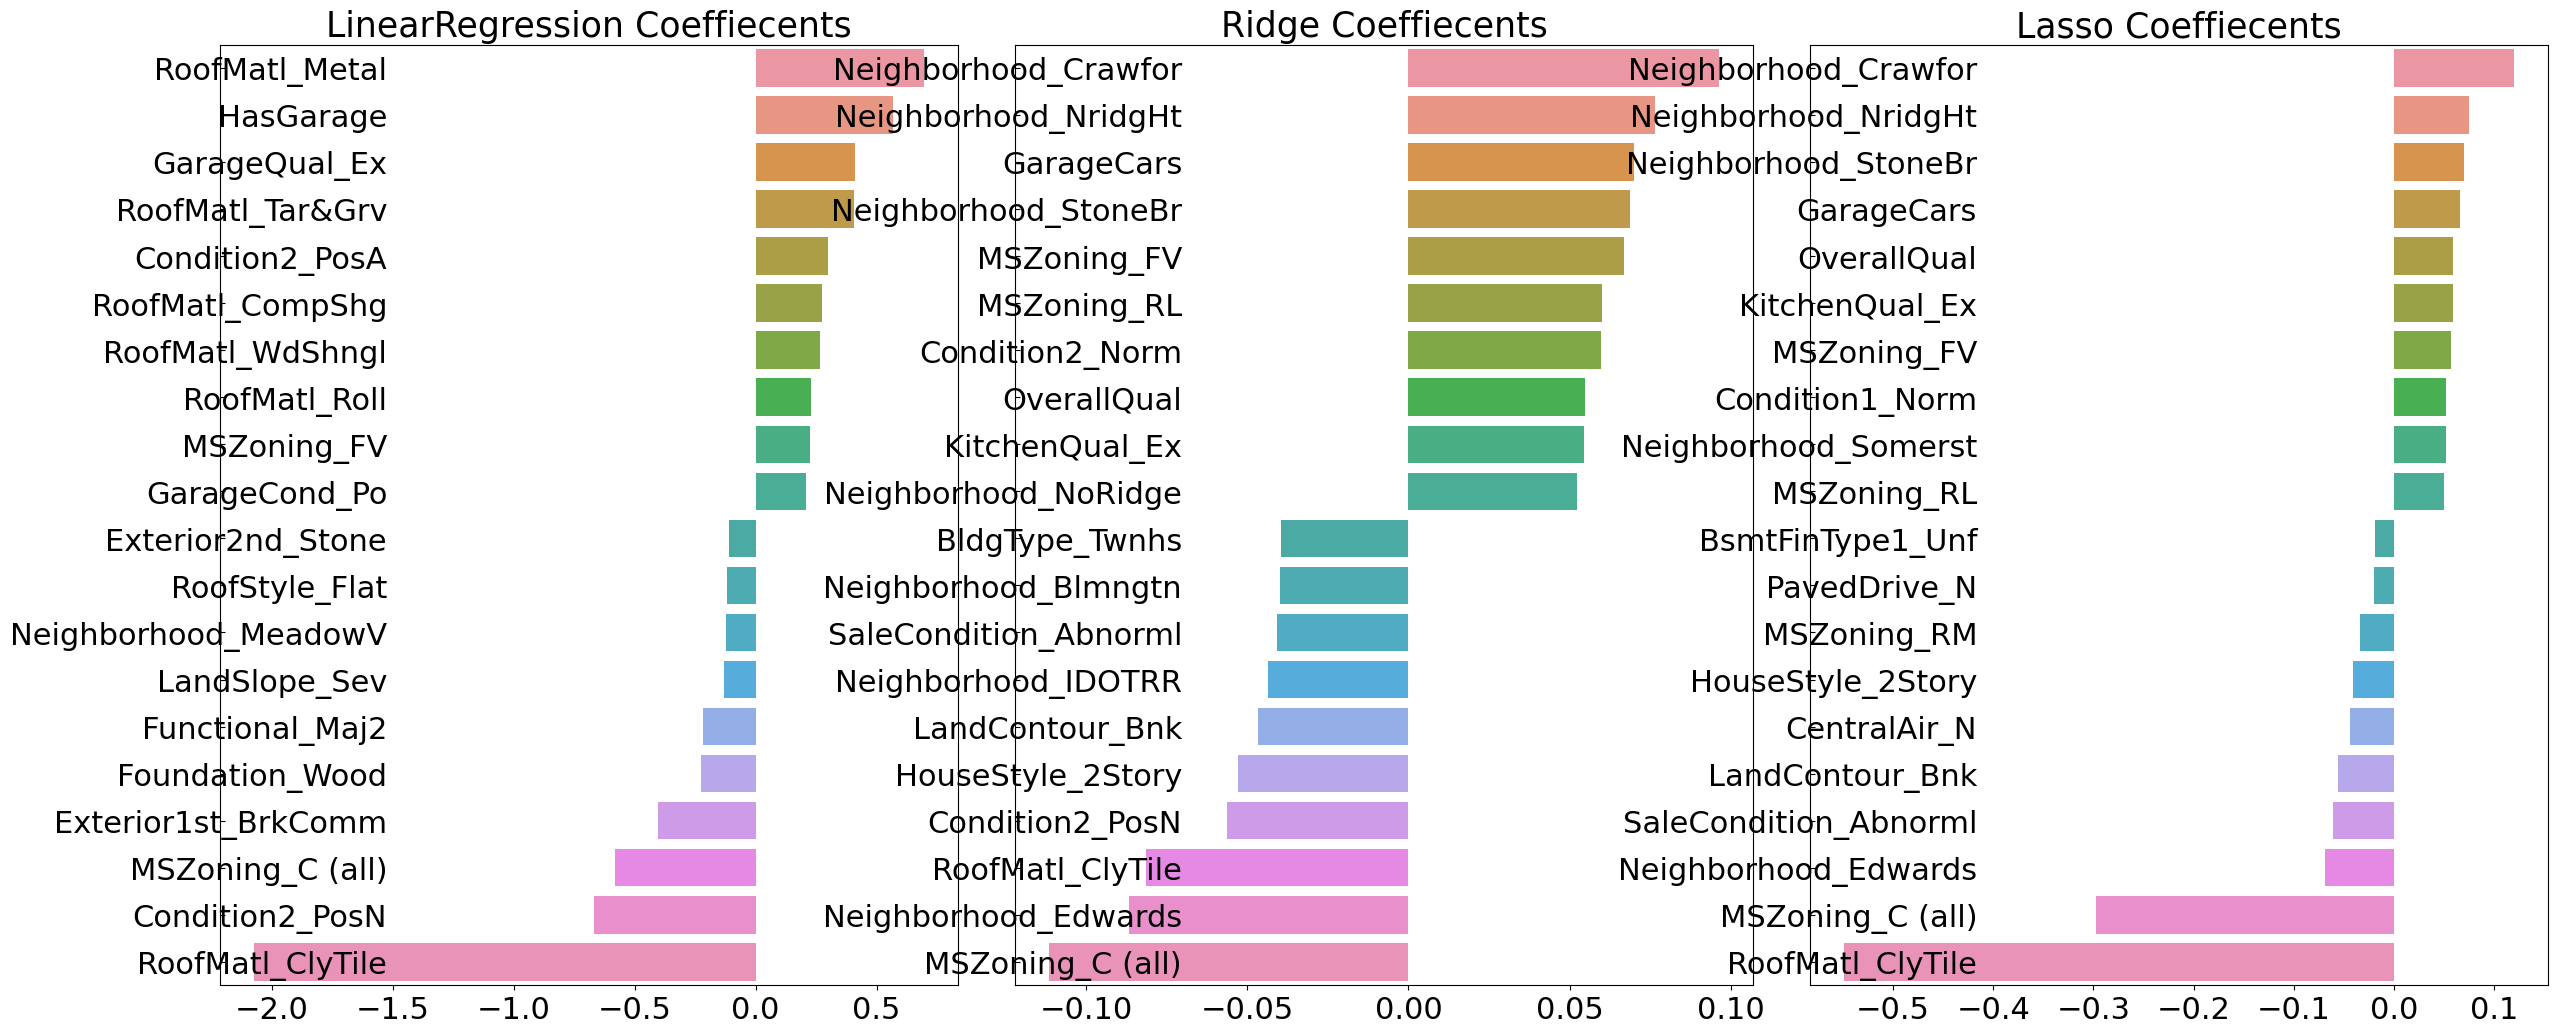

In [32]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [33]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.760540
OpenPorchSF       2.454159
MasVnrArea        2.418589
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


In [34]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [35]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1332, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1295, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.126
Ridge 로그 변환된 RMSE: 0.116
Lasso 로그 변환된 RMSE: 0.112


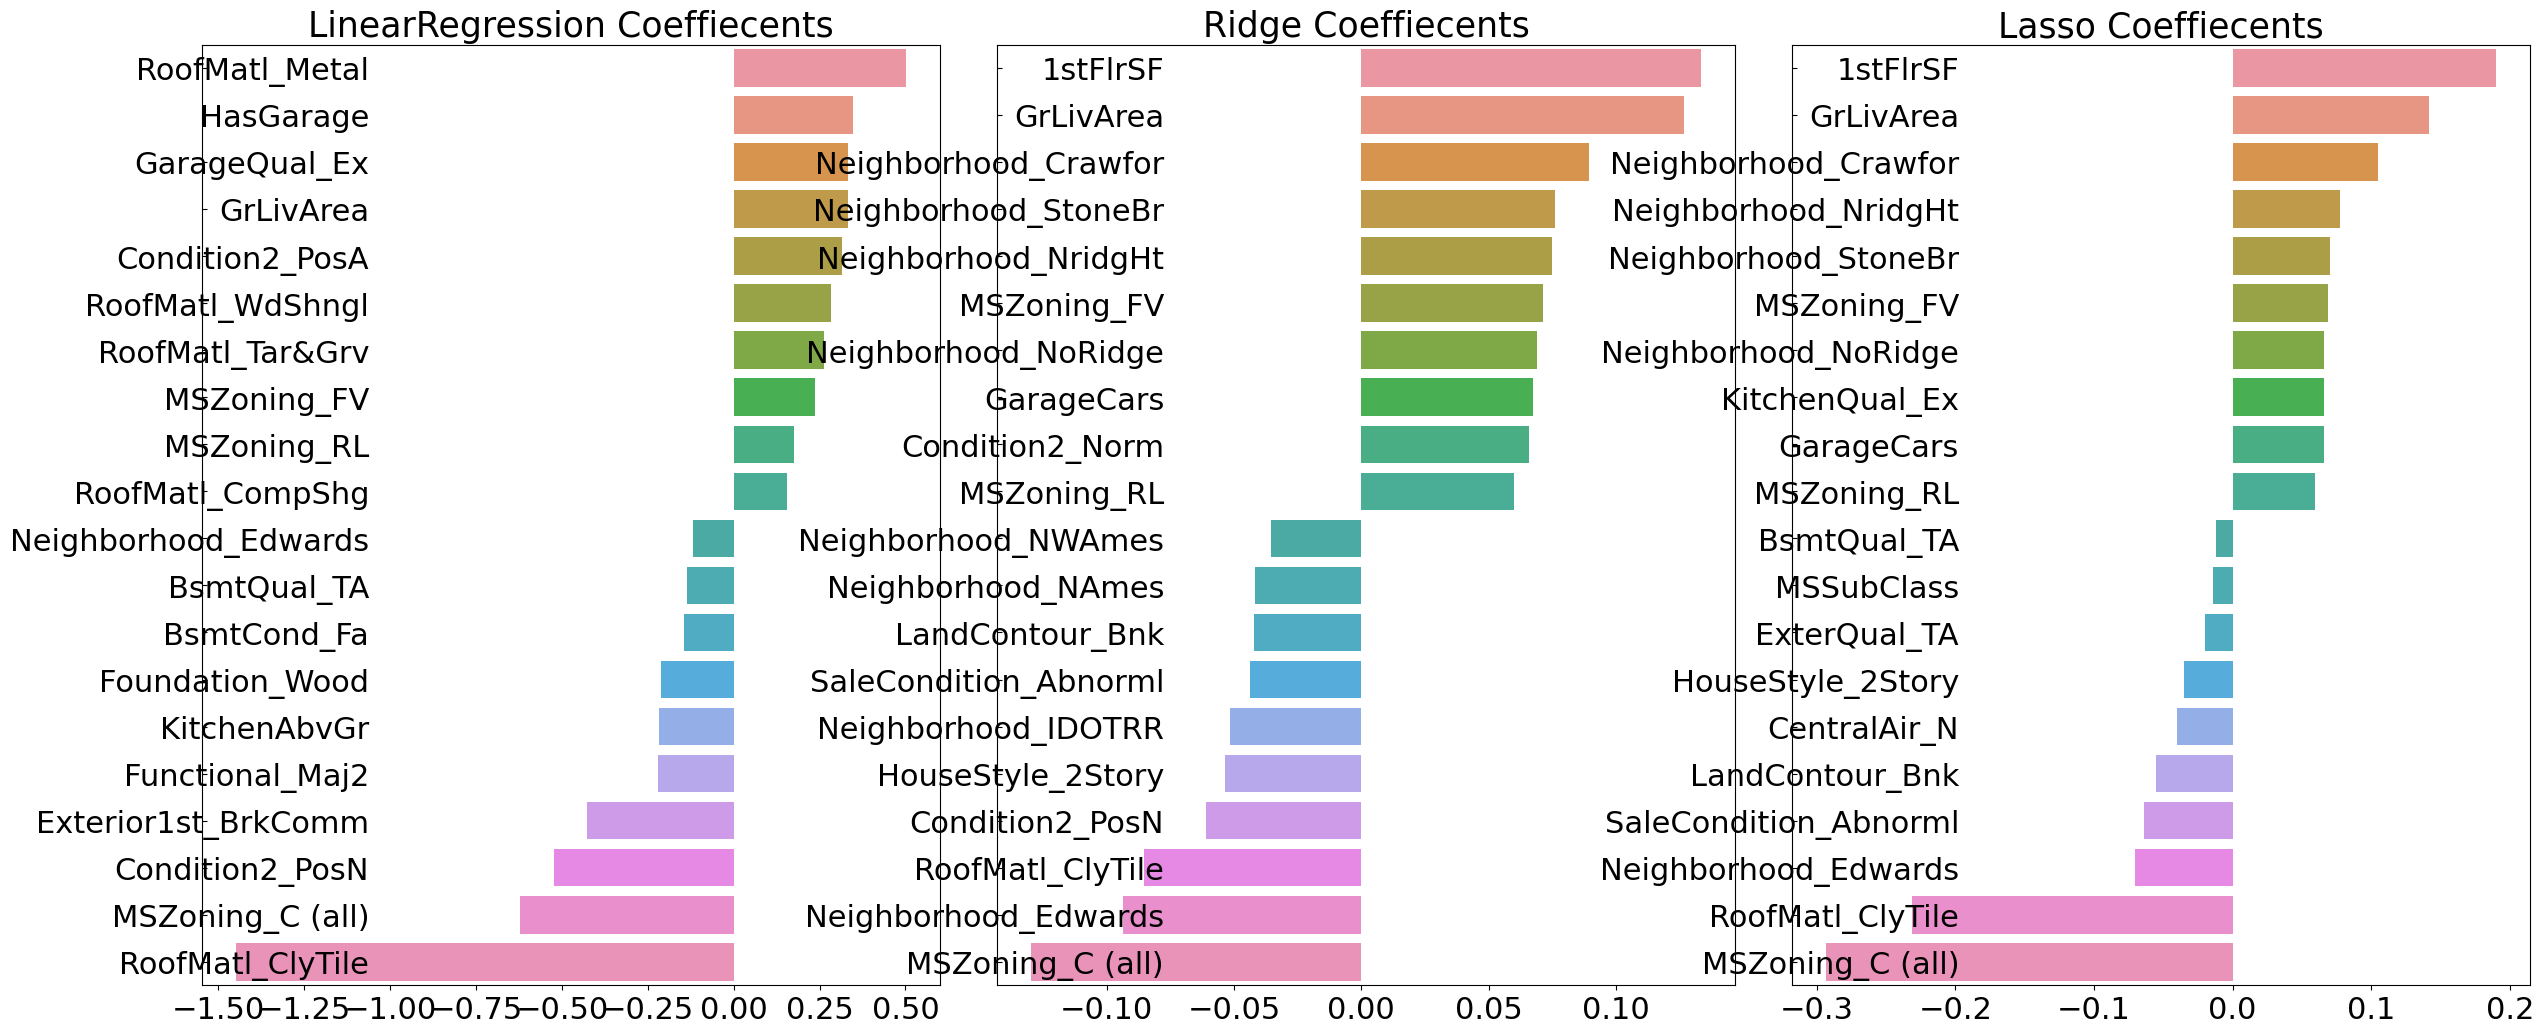

In [36]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [37]:
pd.Series(ridge_reg.coef_, index=X_features.columns).sort_values().head(10)

MSZoning_C (all)        -0.129660
Neighborhood_Edwards    -0.093426
RoofMatl_ClyTile        -0.085184
Condition2_PosN         -0.060874
HouseStyle_2Story       -0.053443
Neighborhood_IDOTRR     -0.051539
SaleCondition_Abnorml   -0.043681
LandContour_Bnk         -0.042320
Neighborhood_NAmes      -0.041629
Neighborhood_NWAmes     -0.035392
dtype: float64

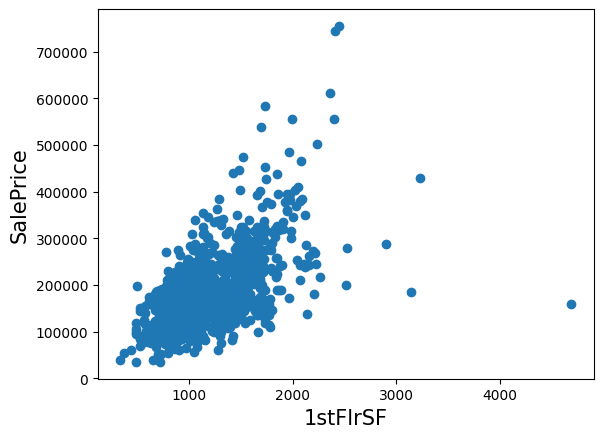

In [38]:
# 피처들이 많고 상관관계가 높은 피처들이 많이 존재하기 때문에 완화 할 수잇는 릿지 라쏘위주로 이상치 확인
plt.scatter(x = house_df_org['1stFlrSF'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.show()

In [39]:
# 1stFlrSF와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['1stFlrSF'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(300000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [64]
아웃라이어 삭제 전 house_df_ohe shape: (1168, 273)
아웃라이어 삭제 후 house_df_ohe shape: (1167, 273)


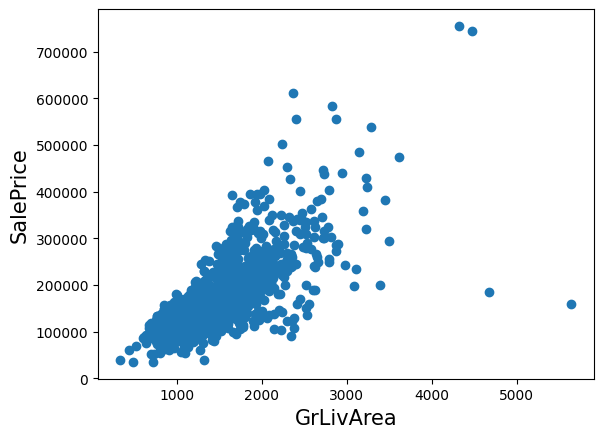

In [40]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [41]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [373]
아웃라이어 삭제 전 house_df_ohe shape: (1167, 273)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 273)


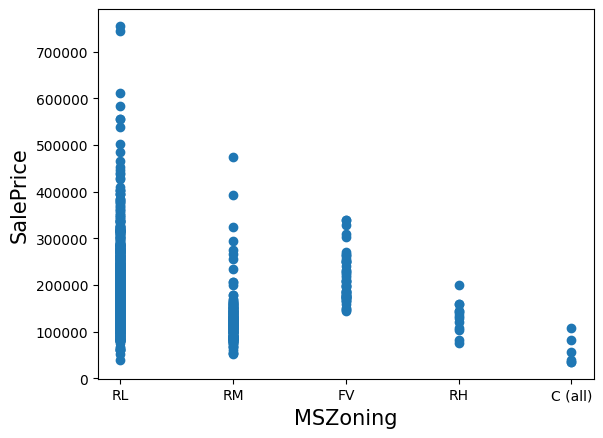

In [42]:
plt.scatter(x = house_df_org['MSZoning'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('MSZoning', fontsize=15)
plt.show()

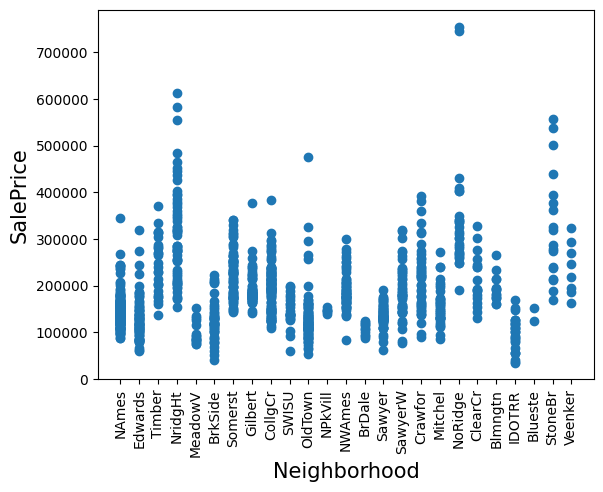

In [43]:
plt.scatter(x = house_df_org['Neighborhood'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Neighborhood', fontsize=15)
plt.xticks(rotation=90)
plt.show()

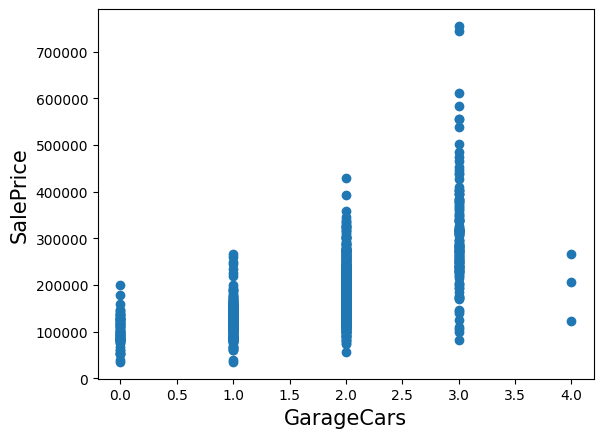

In [44]:
plt.scatter(x = house_df_org['GarageCars'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GarageCars', fontsize=15)
plt.show()

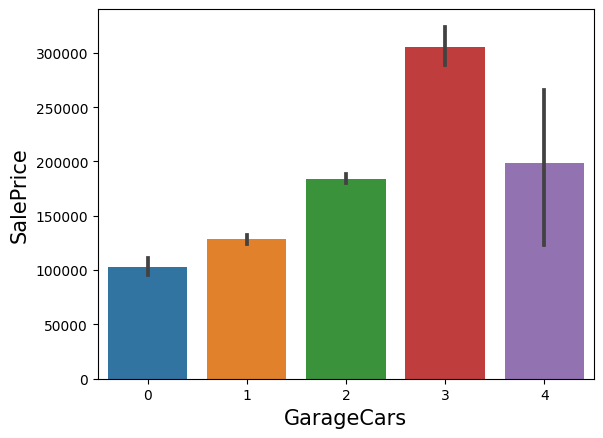

In [45]:
sns.barplot(x = house_df_org['GarageCars'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GarageCars', fontsize=15)
plt.show()

In [46]:
house_df[house_df['GarageCars'] >= 4]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage
499,4.510860,RM,4.369448,8.862342,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,11,2008,WD,Alloca,12.237092,1
882,4.262680,RM,4.189655,9.367430,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,0.0,5,2009,WD,Normal,12.491176,1
1010,3.044522,RL,4.262680,9.023408,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,6,2007,WD,Normal,11.719948,1


In [47]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GarageCars'] == 4
outlier_index = house_df_ohe[cond1].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 499  882 1010]
아웃라이어 삭제 전 house_df_ohe shape: (1166, 273)
아웃라이어 삭제 후 house_df_ohe shape: (1163, 273)


In [48]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1146, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1126, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.111
Ridge 로그 변환된 RMSE: 0.102
Lasso 로그 변환된 RMSE: 0.097


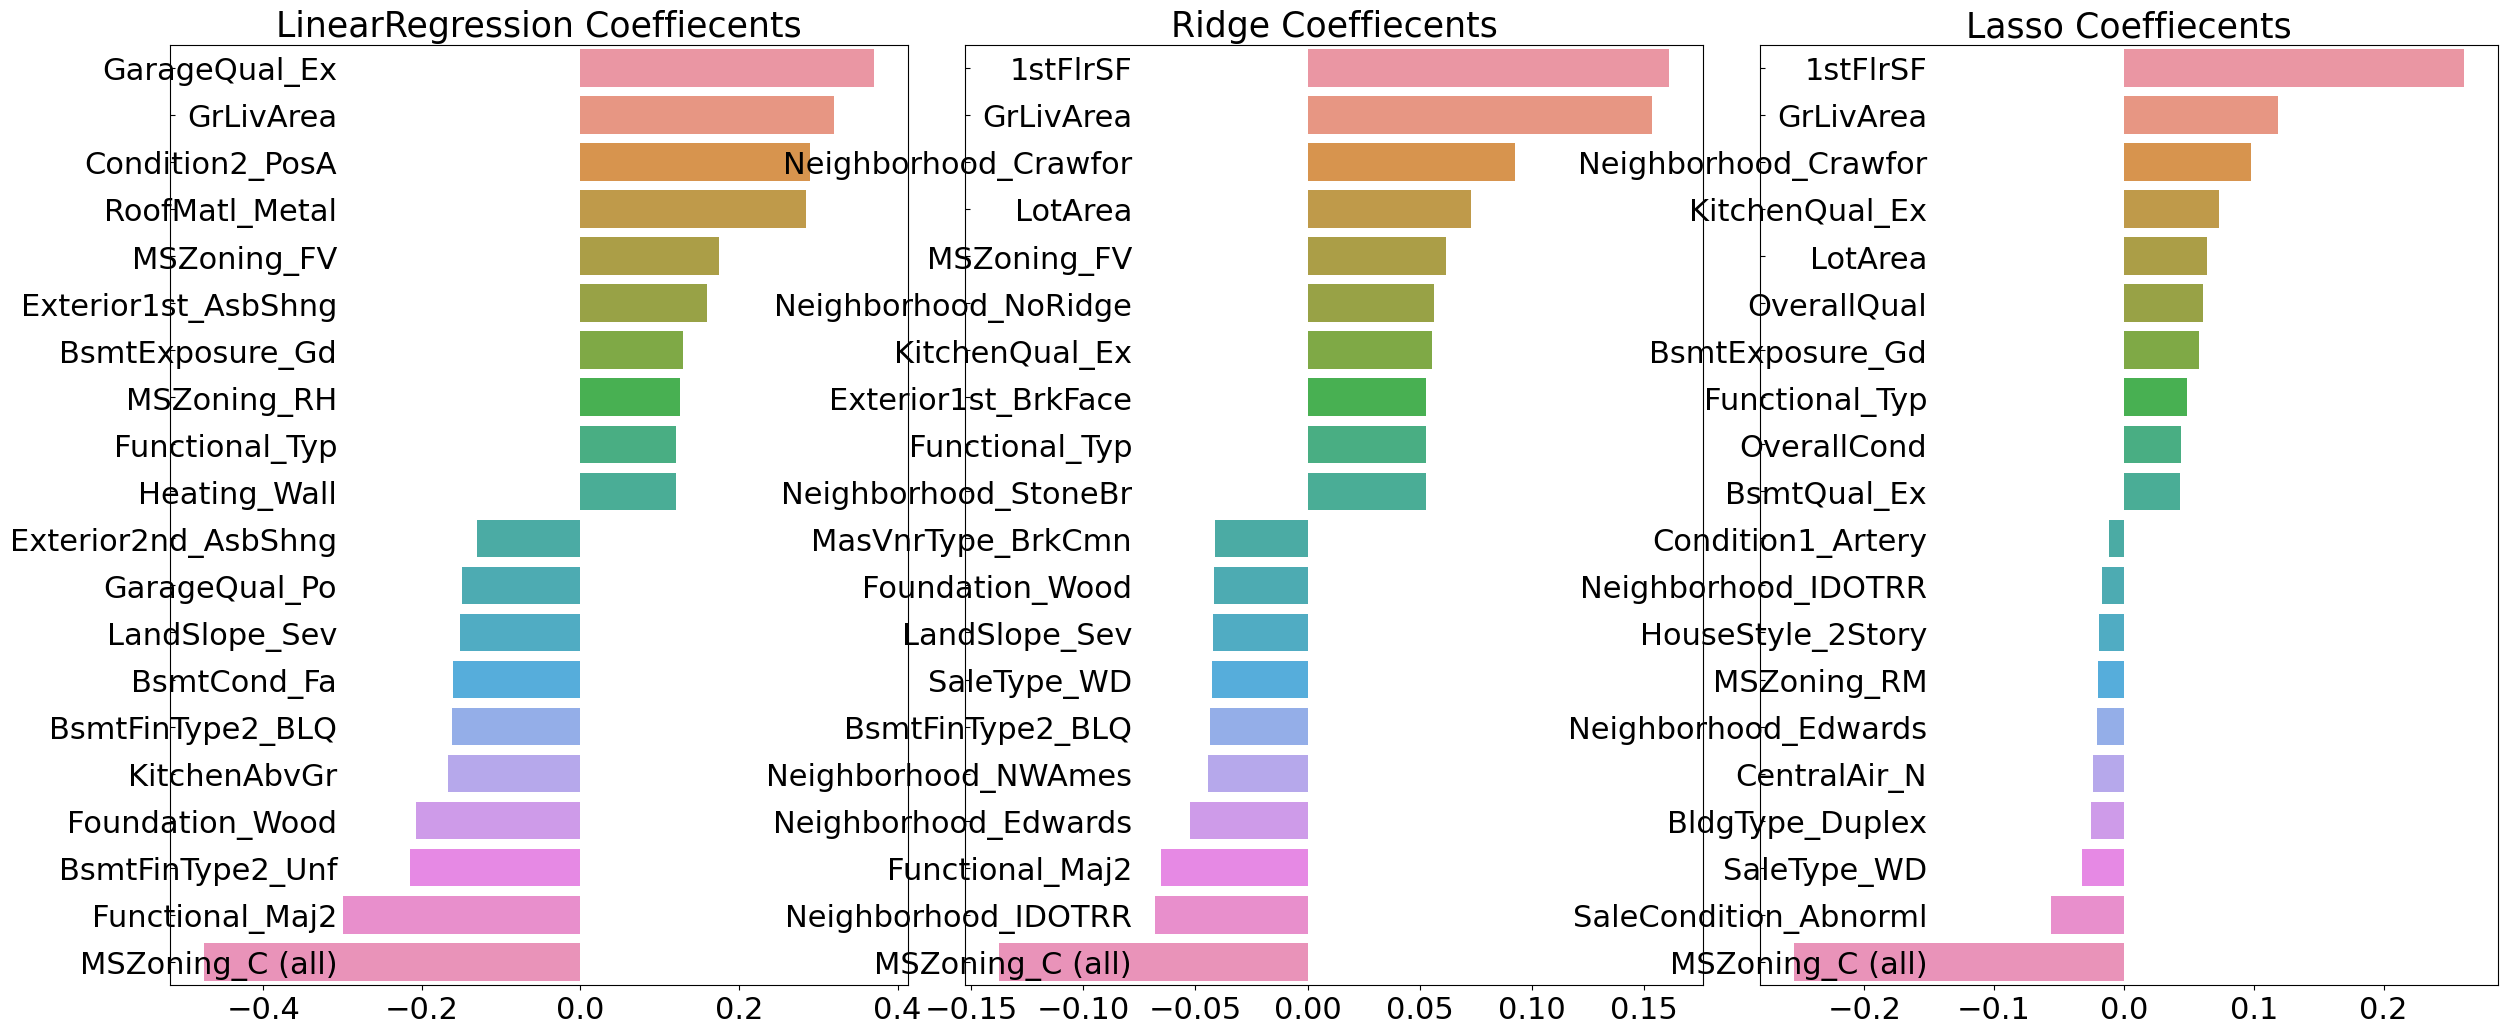

In [49]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

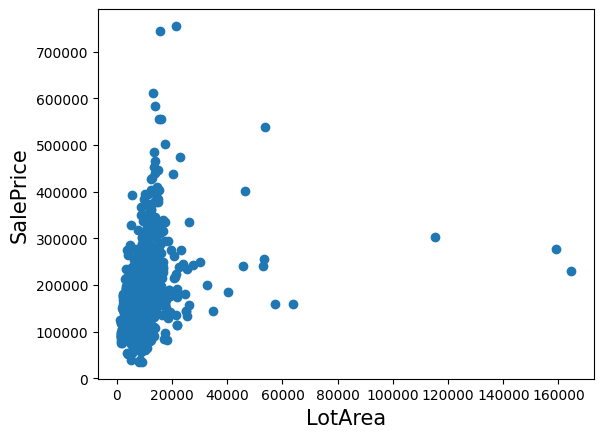

In [50]:
plt.scatter(x = house_df_org['LotArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('LotArea', fontsize=15)
plt.show()

In [51]:
# LotArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['LotArea'] > np.log1p(100000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [270 389 986]
아웃라이어 삭제 전 house_df_ohe shape: (1163, 273)
아웃라이어 삭제 후 house_df_ohe shape: (1160, 273)


In [52]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.0001,0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1147, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1127, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.106
Ridge 로그 변환된 RMSE: 0.095
Lasso 로그 변환된 RMSE: 0.095


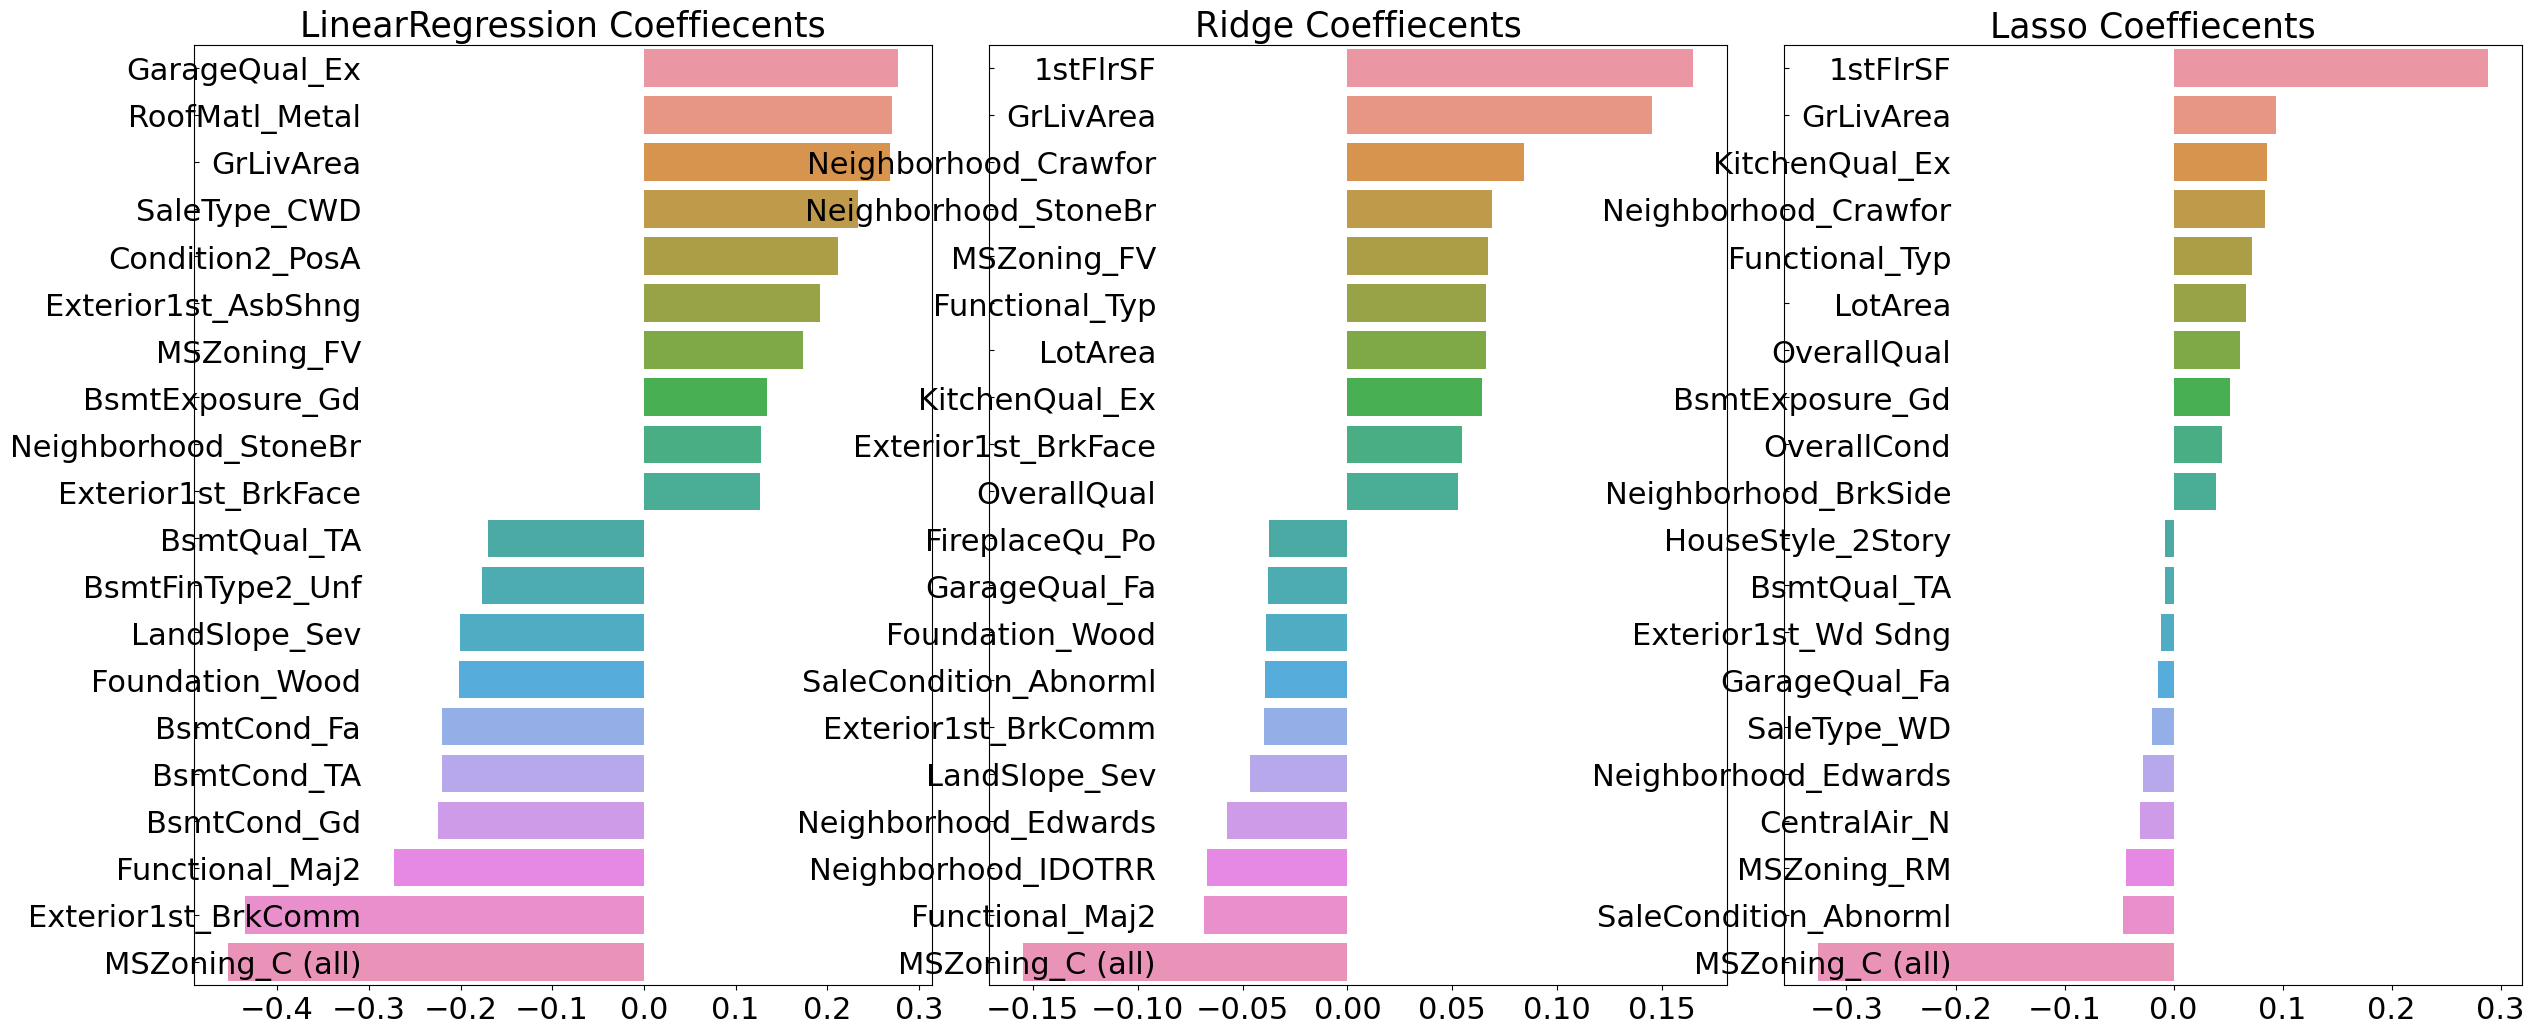

In [53]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

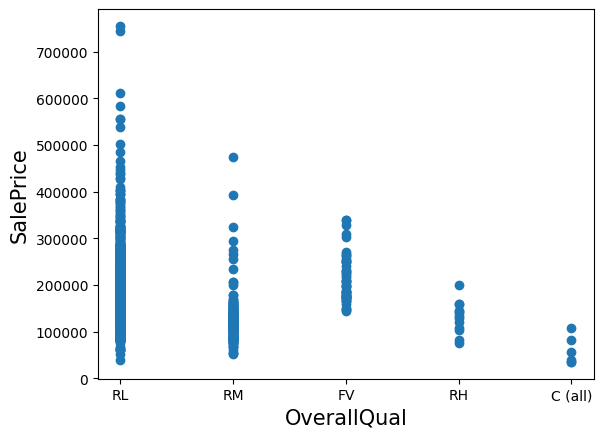

In [54]:
plt.scatter(x = house_df_org['MSZoning'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallQual', fontsize=15)
plt.show()

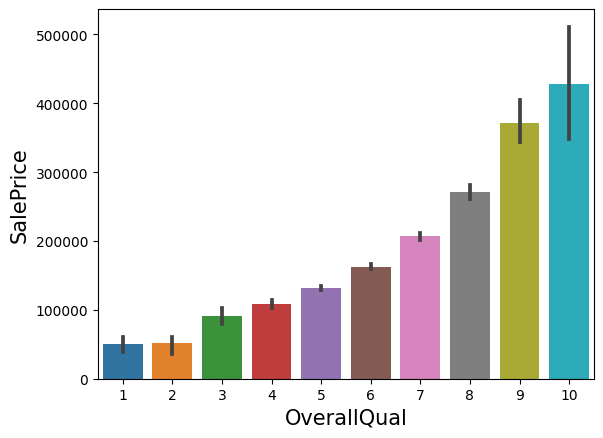

In [55]:
sns.barplot(x = house_df_org['OverallQual'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallQual', fontsize=15)
plt.show()

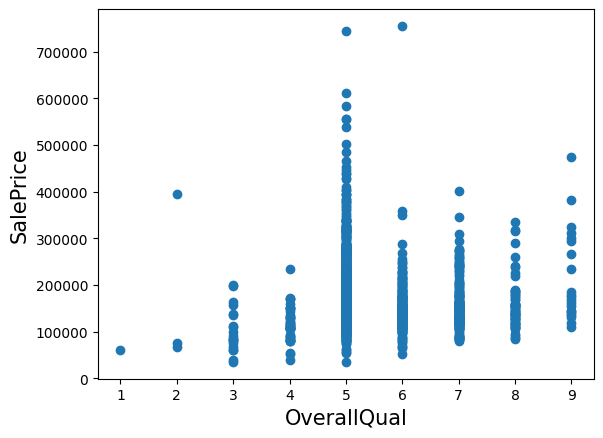

In [56]:
plt.scatter(x = house_df_org['OverallCond'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallQual', fontsize=15)
plt.show()

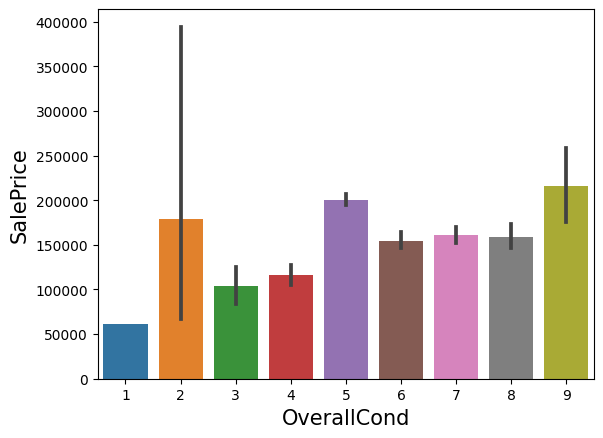

In [57]:
sns.barplot(x = house_df_org['OverallCond'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallCond', fontsize=15)
plt.show()

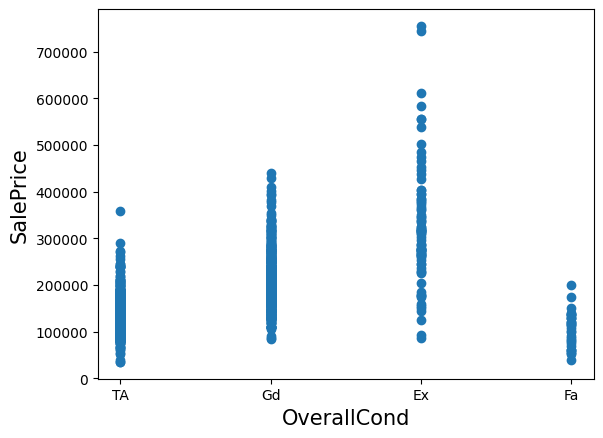

In [58]:
plt.scatter(x = house_df_org['KitchenQual'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallCond', fontsize=15)
plt.show()

In [59]:
house_df_ohe.shape

(1160, 273)

In [60]:
# overallcond == 2 이상치 제거해봤으나 결과가 더 안좋게 나옴.
test = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/test.csv")
submission = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv")

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    251 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          21 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [62]:
test.shape

(292, 80)

In [63]:
test_1 = test.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [64]:
# 결측치를 0으로 대체
test_1['GarageYrBlt'].fillna(0, inplace=True)
# 이진 피처 추가
test_1['HasGarage'] = test_1['GarageYrBlt'].apply(lambda x: 1 if x > 0 else 0)

In [65]:
test_1['LotFrontage'].fillna(test_1['LotFrontage'].mean(),inplace=True)
test_1['MasVnrArea'].fillna(test_1['MasVnrArea'].mean(),inplace=True)

In [66]:
test_1.shape

(292, 76)

In [67]:
test_1[skew_features_top.index] = np.log1p(test_1[skew_features_top.index])

In [68]:
print('get_dummies() 수행 전 데이터 Shape:', test_1.shape)
test_ohe = pd.get_dummies(test_1)
print('get_dummies() 수행 후 데이터 Shape:', test_ohe.shape)

get_dummies() 수행 전 데이터 Shape: (292, 76)
get_dummies() 수행 후 데이터 Shape: (292, 239)


In [69]:
len(house_df_ohe.columns)

273

In [70]:
len(test_ohe.columns)

239

In [71]:
set(house_df_ohe.columns) - set(test_ohe.columns)

{'BsmtCond_Po',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Electrical_FuseP',
 'Electrical_Mix',
 'ExterCond_Ex',
 'ExterCond_Po',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'Functional_Sev',
 'GarageCond_Po',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageType_CarPort',
 'HeatingQC_Po',
 'Heating_OthW',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'RoofMatl_ClyTile',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'SaleCondition_AdjLand',
 'SalePrice',
 'SaleType_CWD',
 'Utilities_NoSeWa'}

In [72]:
# 훈련 데이터에서의 컬럼을 기준으로 테스트 데이터의 컬럼 정렬 및 누락된 컬럼 추가
missing_cols = set(house_df_ohe.columns) - set(test_ohe.columns)
for col in missing_cols:
    test_ohe[col] = 0  # 누락된 컬럼을 추가하고 값은 0으로 채움

# 테스트 데이터의 컬럼 순서를 훈련 데이터와 동일하게 정렬
test_ohe = test_ohe[house_df_ohe.columns]

In [73]:
print('get_dummies() 수행 후 데이터 Shape:', test_ohe.shape)

get_dummies() 수행 후 데이터 Shape: (292, 273)


In [74]:
test_ohe.drop(columns='SalePrice',axis=1,inplace=True)

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    251 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          21 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [76]:
y_pred = ridge_reg.predict(test_ohe)
# 제출 파일 생성
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
submission['SalePrice'] = np.expm1(submission['SalePrice'])
submission.to_csv('submission.csv', index=False)

In [77]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [78]:
elastic_alphas = [0.005, 0.01, 0.07, 0.1, 0.5, 1]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_train, y_target_n=y_train)

#######  ElasticNet #######
alpha 0.005일 때 5 폴드 세트의 평균 RMSE: 0.133 
alpha 0.01일 때 5 폴드 세트의 평균 RMSE: 0.142 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.184 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.195 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.251 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.253 


In [79]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)
elasticnet_reg = ElasticNet()
elastic_params = { 'alpha':[0.0001,0.0003,0.0005,0.0007,0.001],'l1_ratio':[0.5,0.6,0.7,0.8,0.9,0.93,0.95,0.97,1] }
best_elastic = print_best_params(elasticnet_reg, elastic_params)

ElasticNet 5 CV 시 최적 평균 RMSE 값: 0.1108, 최적 alpha:{'alpha': 0.0005, 'l1_ratio': 1}


ElasticNet 로그 변환된 RMSE: 0.091


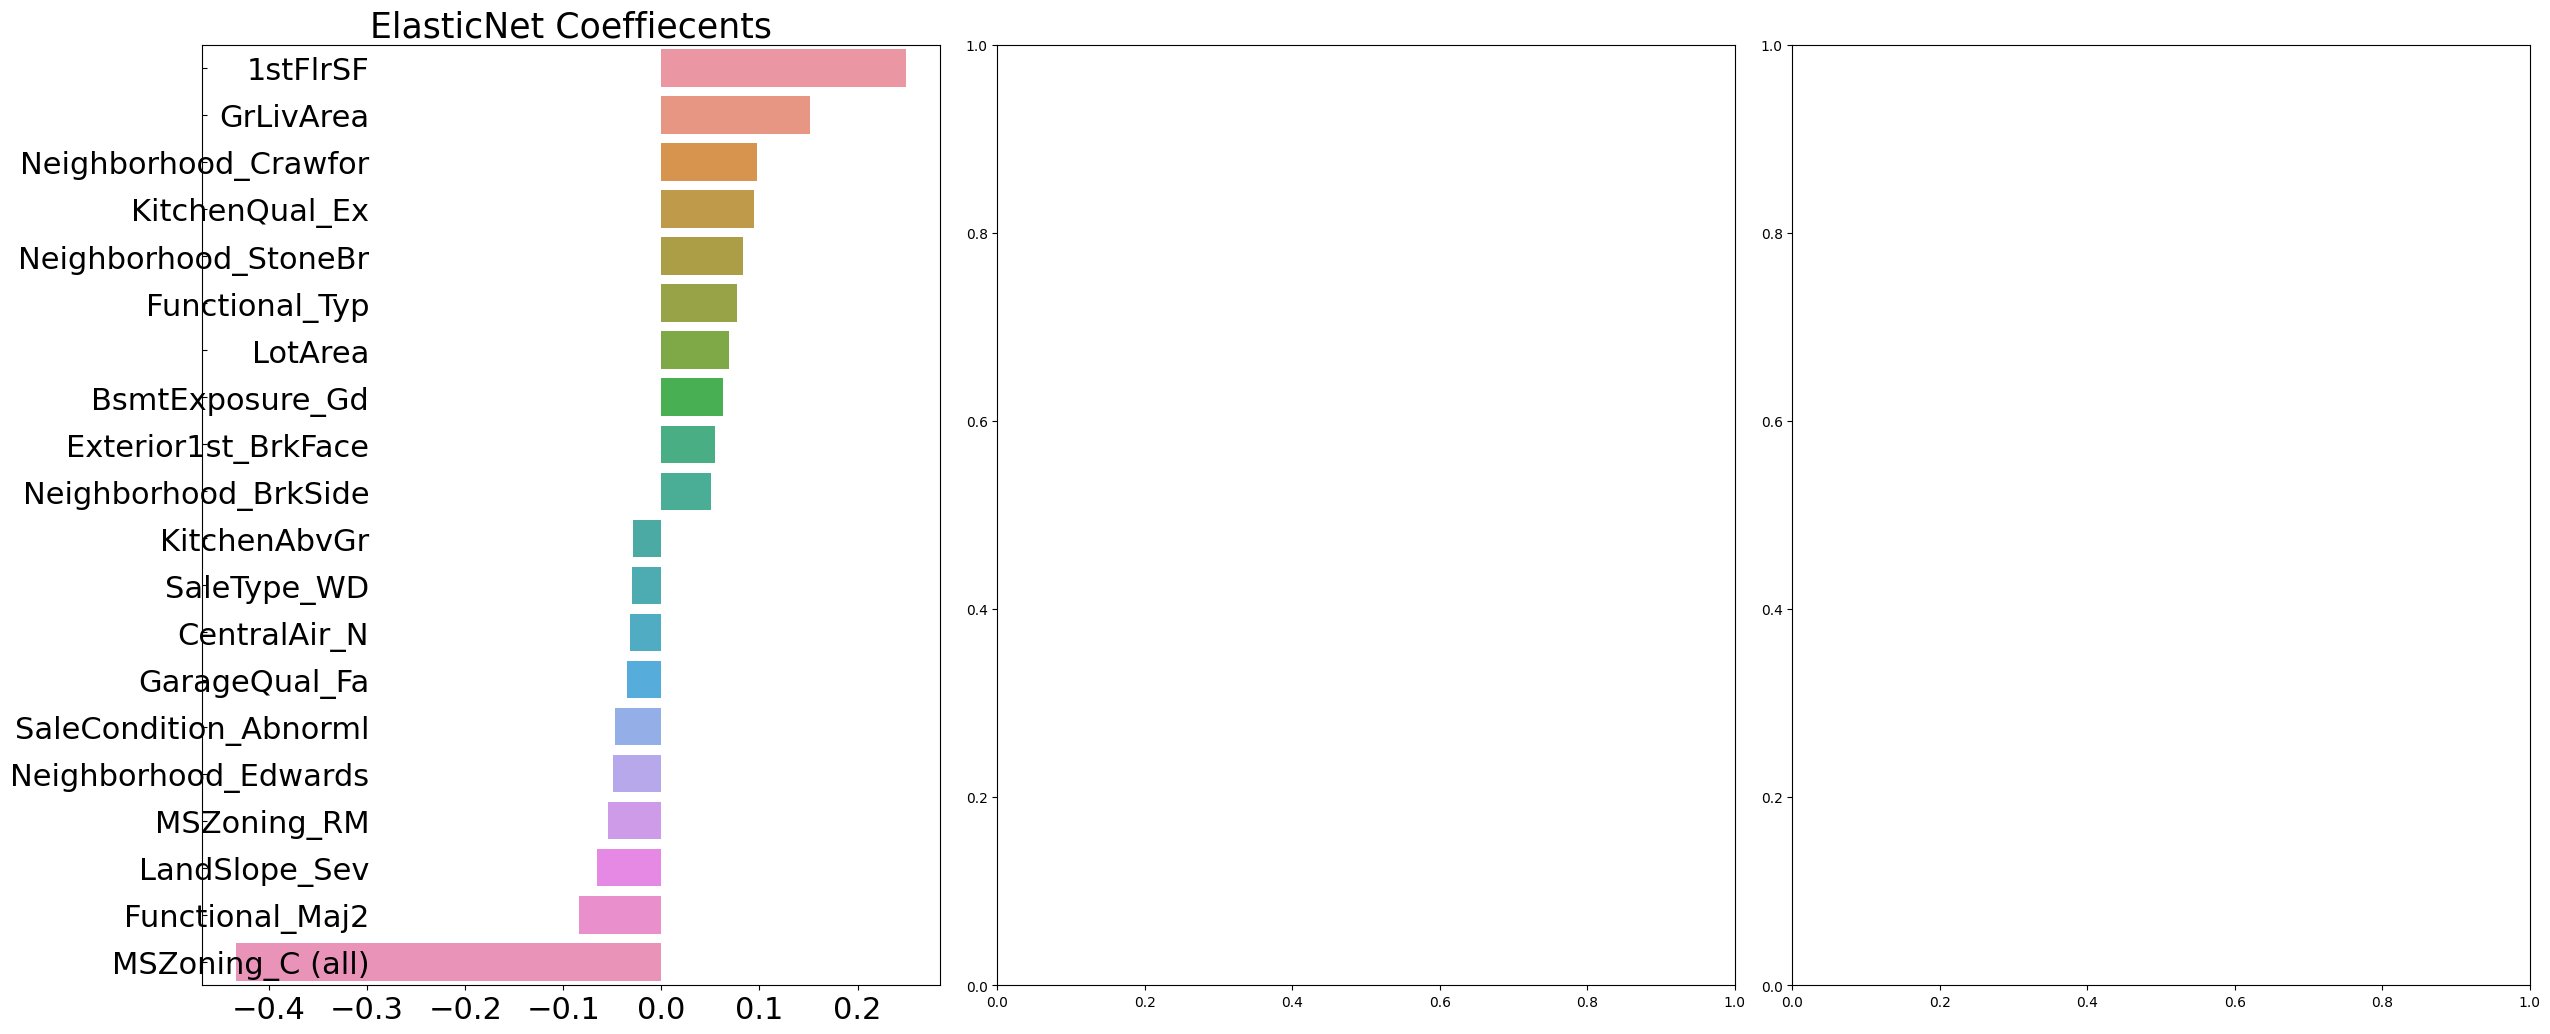

In [80]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
elasticnet_reg = ElasticNet(alpha= 0.0005, l1_ratio= 0.9
                           )
elasticnet_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [elasticnet_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [elasticnet_reg]
visualize_coefficient(models)

In [81]:
y_pred = elasticnet_reg.predict(test_ohe)
# 제출 파일 생성
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
submission['SalePrice'] = np.expm1(submission['SalePrice'])
submission.to_csv('submission.csv', index=False)

In [82]:
submission

,Id,SalePrice
0,86,268496.095320
1,227,262633.970110
2,492,152754.837773
3,64,137985.705017
4,576,116671.286187
...,...,...
287,1271,213974.231035
288,903,180723.055761
289,1019,170401.641224
290,312,134950.660107


In [83]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(X_features)

In [84]:
# pca = PCA()
# pca.fit(df_scaled)  # data는 스케일링된 데이터

# # 설명 분산 비율 확인
# explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# # 그래프로 확인
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()

# # 95% 이상의 설명력을 갖는 주성분 수 확인
# n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1
# print(f"Number of components to retain 95% variance: {n_components_95}")

In [85]:
# y_target = house_df_ohe['SalePrice']
# X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
# pca = PCA(150)
# pca.fit_transform(X_features)
# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)
# elasticnet_reg = ElasticNet()
# elastic_params = { 'alpha':[0.0001,0.0003,0.0005,0.0007,0.001],'l1_ratio':[0.5,0.6,0.7,0.8,0.9,0.93,0.95,0.97,1] }
# best_elastic = print_best_params(elasticnet_reg, elastic_params)

In [86]:
# # 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
# elasticnet_reg = ElasticNet(alpha= 0.0005, l1_ratio= 0.9
#                            )
# elasticnet_reg.fit(X_train, y_train)

# # 모든 모델의 RMSE 출력
# models = [elasticnet_reg]
# get_rmses(models)

# # 모든 모델의 회귀 계수 시각화 
# models = [elasticnet_reg]
# visualize_coefficient(models)

# 회고
- 회귀시 중요 피처를 시각화해 이상치를 제거하는 것이 모델 성능향상에 아주 큰 역할을 했다.
- 카테고리 값 이상치로 보이는 데이터를 생각해서 제거했는데 모델 성능에 안 좋은 영향을 주었다.
- l1규제는 피처를 선택할 수 있는 역할을 하는데 이 데이터가 피처간 상관성이 높은 데이터여서 
- 엘라스틱넷 하이퍼파라미터 최적화를 할 때 l1규제의 비율을 높이는 쪽으로 최적화가 되었다. 1까지
- 교차검증말고 모든 데이터를 넣고 학습했을 때는 l1보다는 0.9로 두는 것이 성능에 더 좋았다.
- 전처리할 때 모델에 영향을 크게 미치는 피처와 상관관계가 높으면서 모델에 크게 영향을 미치지 않는다고 판단되는 피처를 제거 하고 예측해봤는데
- 성능에 좋지 못한 영향을 주었다. 데이터를 삭제 하는 것은 아주 신중해야 함을 다시 한번 느꼈다.
- PCA전에는 스케일링을 해야한다.
- 데이터 전처리할 때 원핫인코딩, 로그변환, 컬럼삭제 등으로 전처리 했으면 테스트 시 데이터도 같게 처리 해줘야 한다.
- 타깃값을 로그변환 한 것은 예측후에 다시 지수변환해서 돌려야 원래 원하는 값으로 바뀐다.